## Import Libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data 

In [148]:
import os
os.chdir("C:\\Users\\hp\\Downloads\\archive (1)")

In [149]:
df = pd.read_csv('IRIS.csv')

In [150]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Explore the data

In [151]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


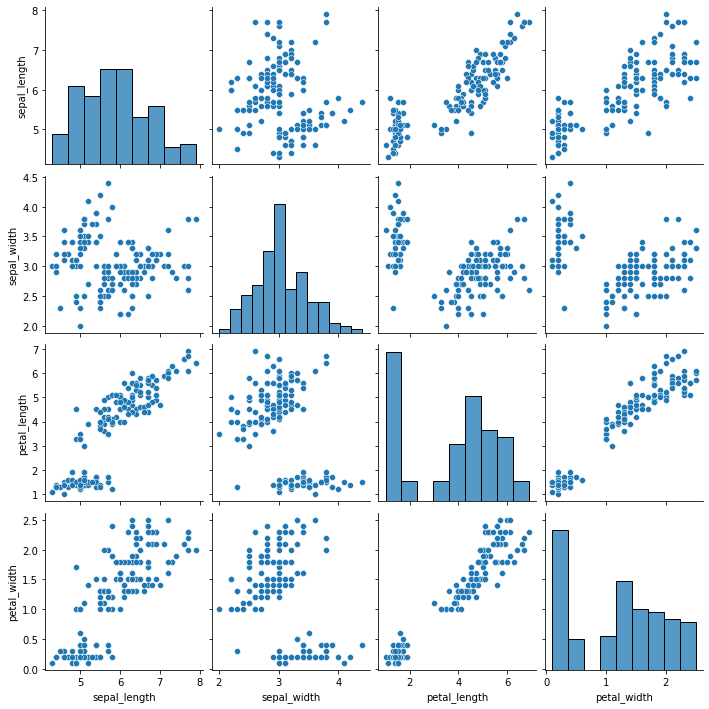

In [152]:
sns.pairplot(data=df)

In [153]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Train/Test Split

In [154]:
from sklearn.model_selection import train_test_split

Divide the data into features (X) which are given to model to predict and Labels (Y) which the model should predict. And also these are converted into array values

In [155]:
X = df.drop('species',axis=1).values
y = df['species'].values

In [156]:
#y

Here if we observe the y is string array containing the which flower the four features belong to. As giving strings to our model not makes any sense. We convert them labels which are represented like 0,1,2......

In [157]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()

y = encoder.fit_transform(y)

In [158]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In the scienario the flower names doest not have any ranking. But when we Label encoded it, the flower names are ranked based on the alphabets. Due to this our model may catch the relationship Iris-setosa < Iris-versicolor < Iris-virginica . This problem can be solved using the One-Hot Encding

## One-Hot Encoding

One-Hot Encoding creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [159]:
y = pd.get_dummies(y).values

In [160]:
y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

As you can see here, 3 new features are added as the country contains 3 unique values – Iris-setosa, Iris-versicolor and Iris-virginica. In this technique, we solved the problem of ranking as each category is represented by a binary vector.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [162]:
y_train.shape

(112, 3)

# Creating a Model

 ### For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy']) 
                  
    For the Dense layer we are using rectified linear unit (relu) as activation function and for the final layer as the prediction is between three different classes, we are using softmax

In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [164]:
model = Sequential()

model.add(Dense(50, input_shape=(4,),activation='relu'))
model.add(Dense(30, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [165]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [166]:
model.fit(X_train, y_train, batch_size=50, epochs=120)

Epoch 1/120
3/3 [==============================] - 1s 5ms/step - loss: 1.3237 - accuracy: 0.5089
Epoch 2/120
3/3 [==============================] - 0s 4ms/step - loss: 1.0377 - accuracy: 0.5179
Epoch 3/120
3/3 [==============================] - 0s 4ms/step - loss: 0.9588 - accuracy: 0.7054
Epoch 4/120
3/3 [==============================] - 0s 3ms/step - loss: 0.9188 - accuracy: 0.6964
Epoch 5/120
3/3 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.7054
Epoch 6/120
3/3 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.6696
Epoch 7/120
3/3 [==============================] - 0s 4ms/step - loss: 0.8347 - accuracy: 0.7679
Epoch 8/120
3/3 [==============================] - 0s 3ms/step - loss: 0.8110 - accuracy: 0.7054
Epoch 9/120
3/3 [==============================] - 0s 2ms/step - loss: 0.7809 - accuracy: 0.7143
Epoch 10/120
3/3 [==============================] - 0s 3ms/step - loss: 0.7689 - accuracy: 0.6875
Epoch 11/120
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9821
Epoch 85/120
3/3 [==============================] - 0s 3ms/step - loss: 0.1604 - accuracy: 0.9732
Epoch 86/120
3/3 [==============================] - 0s 3ms/step - loss: 0.1632 - accuracy: 0.9464
Epoch 87/120
3/3 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.9732
Epoch 88/120
3/3 [==============================] - 0s 4ms/step - loss: 0.1495 - accuracy: 0.9732
Epoch 89/120
3/3 [==============================] - 0s 4ms/step - loss: 0.1571 - accuracy: 0.9554
Epoch 90/120
3/3 [==============================] - 0s 4ms/step - loss: 0.1589 - accuracy: 0.9732
Epoch 91/120
3/3 [==============================] - 0s 4ms/step - loss: 0.1493 - accuracy: 0.9554
Epoch 92/120
3/3 [==============================] - 0s 4ms/step - loss: 0.1448 - accuracy: 0.9732
Epoch 93/120
3/3 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.9464
Epoch 94/120
3/3 [===============

<AxesSubplot:>

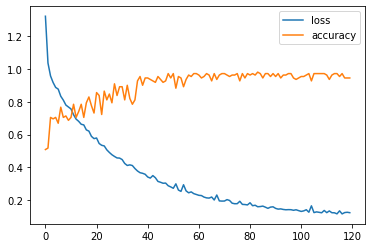

In [167]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evalution

In [168]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.10585443675518036
Test accuracy: 1.0


## Model Prediction

In [169]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [170]:
y_pred

array([[9.99949932e-01, 4.98237314e-05, 2.39587536e-07],
       [9.99898195e-01, 1.01230515e-04, 5.58333454e-07],
       [9.98341203e-01, 1.64756773e-03, 1.11694708e-05],
       [1.28461643e-05, 2.53070235e-01, 7.46916950e-01],
       [4.42393764e-04, 9.81036425e-01, 1.85211804e-02],
       [6.03795233e-05, 2.82365620e-01, 7.17574000e-01],
       [2.53174192e-04, 5.21413743e-01, 4.78333026e-01],
       [9.43467952e-04, 7.72271097e-01, 2.26785421e-01],
       [1.77700695e-05, 1.07484646e-01, 8.92497599e-01],
       [9.98881161e-01, 1.11031299e-03, 8.58880958e-06],
       [2.16075587e-05, 1.82049423e-01, 8.17929029e-01],
       [9.99897242e-01, 1.02147729e-04, 5.93507991e-07],
       [9.99390244e-01, 6.06618181e-04, 3.09825373e-06],
       [7.51743698e-08, 7.96160288e-03, 9.92038369e-01],
       [7.11312823e-05, 3.34434241e-01, 6.65494680e-01],
       [8.52322555e-04, 9.74565446e-01, 2.45822761e-02],
       [1.04597851e-03, 9.40503120e-01, 5.84509037e-02],
       [8.44377209e-04, 9.13794

In [171]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

prediction = pd.DataFrame({'Actual':actual,'Predicted':predicted})

In [172]:
prediction

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,2,2
4,1,1
5,2,2
6,1,1
7,1,1
8,2,2
9,0,0


## Saving the Model

In [173]:
from tensorflow.keras.models import load_model

In [175]:
model.save('my_model.h5')

## Model Prediction

In [144]:
from tensorflow.keras.models import load_model
new_model = load_model('my_model.h5')

def IRIS_prediction(input_data):
    input_to_array = scaler.transform(input_data)
    prediction1 = new_model.predict(input_to_array)
    
    prediction = []
    
    for i in range(0,3):
        prediction.append(prediction1[0][i])
    
    max_value = max(prediction)
    index = prediction.index(max_value)
    
    if(index == 0):
        return "Iris-Setosa"
    elif(index == 1):
        return "Iris-versicolor"
    elif (index == 2):
        return "Iris-virginica"

In [145]:
my_pred = [[2.5,3.4,1.0,0.4]]

In [146]:
IRIS_prediction(my_pred)

1/1 [==============================] - 0s 77ms/step


'Iris-Setosa'